In [2]:


import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder






In [4]:
#import sys
#print(sys.executable)

C:\Users\OMER\AppData\Local\Programs\Python\Python310\python.exe


# Key statistics

In [4]:
tv_ = pd.read_pickle("tv_show.pkl")
#tv_.info()

tv_.describe(include=[float, int])

#print(tv_[['year_start','year_end']])

,id,number_of_seasons,number_of_episodes,vote_count,vote_average,popularity,episode_run_time,languages_num,spoken_languages_num,production_countries_num,year_start,month_start,year_end,month_end
count,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,168639.000000,110050.000000,109280.000000,77511.000000,136903.000000,136903.000000,138735.000000,138735.000000
mean,111307.074704,1.548497,24.465082,13.305054,2.333843,5.882644,22.603348,1.059727,1.052214,1.059063,2010.407230,6.273646,2011.566569,6.585382
std,76451.662352,2.942872,134.799622,190.809059,3.454334,42.023216,47.950427,0.312405,0.294380,0.366752,13.867263,3.560848,13.433711,3.542824
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1917.000000,1.000000,1917.000000,1.000000
25%,45936.500000,1.000000,1.000000,0.000000,0.000000,0.600000,0.000000,1.000000,1.000000,1.000000,2006.000000,3.000000,2007.000000,3.000000
50%,97734.000000,1.000000,6.000000,0.000000,0.000000,0.857000,0.000000,1.000000,1.000000,1.000000,2015.000000,6.000000,2017.000000,6.000000
75%,196923.500000,1.000000,20.000000,1.000000,6.000000,2.431500,42.000000,1.000000,1.000000,1.000000,2020.000000,9.000000,2021.000000,10.000000
max,251213.000000,240.000000,20839.000000,21857.000000,10.000000,3707.008000,6032.000000,12.000000,12.000000,22.000000,2046.000000,12.000000,2024.000000,12.000000


# correlation

In [3]:
tv_.corr(numeric_only=True)



,id,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,adult,in_production,popularity,origin_country,episode_run_time,changed_name,languages_num,spoken_languages_num,production_countries_num,year_start,month_start,year_end,month_end
id,1.000000,-0.065146,-0.067419,0.299899,-0.048987,-0.172831,0.029984,0.484207,-0.051794,0.074749,-0.168339,0.038052,-0.007311,-0.001439,-0.029001,0.410605,0.014006,0.361421,0.004651
number_of_seasons,-0.065146,1.000000,0.416187,-0.011424,0.066078,0.160095,-0.014074,0.118874,0.189827,0.061858,0.063044,-0.016845,0.002133,0.005831,0.005102,-0.149596,-0.001264,0.042448,0.017372
number_of_episodes,-0.067419,0.416187,1.000000,0.008217,0.035587,0.093101,-0.016900,0.014981,0.342217,0.033450,0.033304,0.019895,0.002670,-0.001426,-0.003685,-0.092433,0.001606,0.008544,0.013439
original_language,0.299899,-0.011424,0.008217,1.000000,-0.026802,0.017051,0.023555,0.157431,-0.024759,-0.056972,-0.007889,0.273638,0.003461,-0.010356,-0.057231,0.166684,0.001884,0.148124,-0.013348
vote_count,-0.048987,0.066078,0.035587,-0.026802,1.000000,0.110259,-0.007057,-0.025393,0.215926,0.055881,0.018150,0.009624,0.023234,0.025731,0.023603,0.005771,0.006402,0.023649,0.000390
vote_average,-0.172831,0.160095,0.093101,0.017051,0.110259,1.000000,0.025371,-0.148325,0.125295,0.157658,0.157878,0.240064,0.068092,0.078843,0.049320,-0.022469,0.009849,0.017064,0.016057
adult,0.029984,-0.014074,-0.016900,0.023555,-0.007057,0.025371,1.000000,-0.029323,-0.015477,0.009766,-0.021553,0.128265,0.007453,0.010724,-0.016879,0.007489,0.010980,0.001862,0.004222
in_production,0.484207,0.118874,0.014981,0.157431,-0.025393,-0.148325,-0.029323,1.000000,-0.003308,-0.048821,-0.154134,-0.117311,-0.009405,-0.004717,-0.013238,0.352960,0.000852,0.370949,-0.003661
popularity,-0.051794,0.189827,0.342217,-0.024759,0.215926,0.125295,-0.015477,-0.003308,1.000000,0.070133,0.028049,0.018727,0.010811,0.007445,0.007464,-0.047886,0.010074,0.000172,0.015871
origin_country,0.074749,0.061858,0.033450,-0.056972,0.055881,0.157658,0.009766,-0.048821,0.070133,1.000000,0.106224,0.066520,0.047391,0.038429,0.058458,-0.066496,0.014795,-0.061914,-0.004960


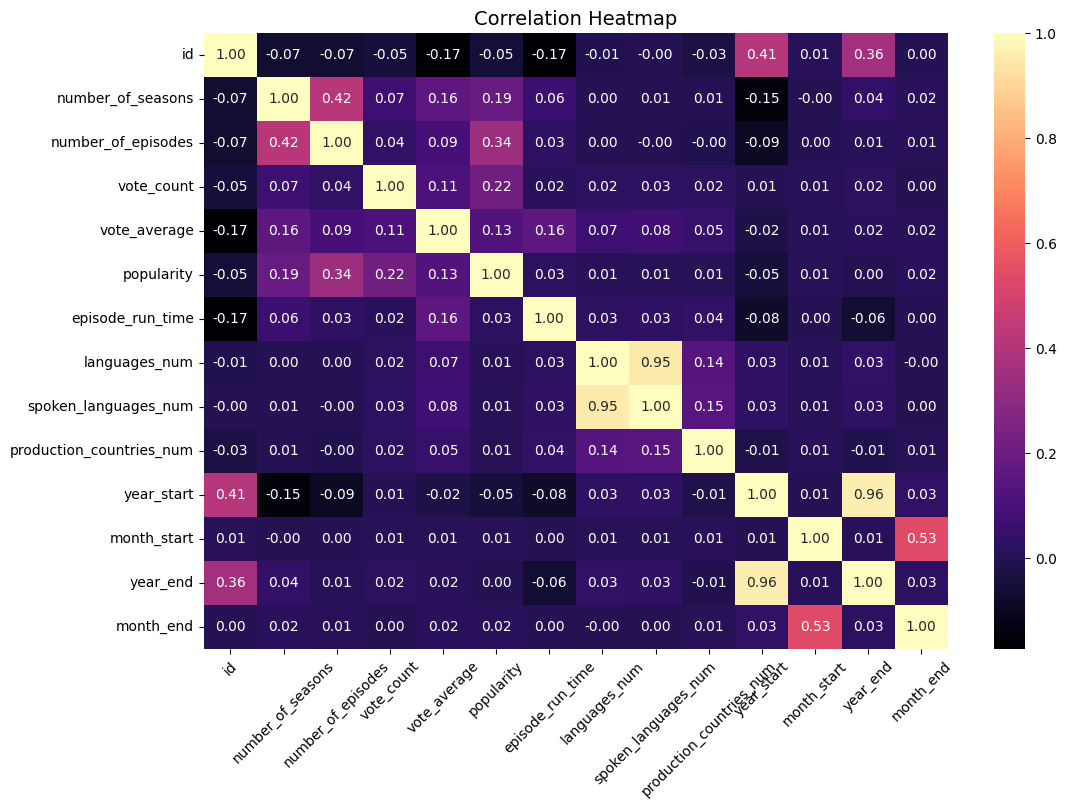

In [4]:
correlation_matrix = tv_.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.heatmap(correlation_matrix, cmap='magma', annot=True, fmt=".2f")

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


# Skew

In [5]:
#for col in tv_.select_dtypes([float, int]):
    #print(col,': ',tv_[col].skew())
con_df = tv_[[col for col in tv_.select_dtypes([float,int])]]
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default  
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

''' the overall data is very skewed no normal distribution interpetation should be applied
thoes skewed values are essential for the model'''

C:\Users\OMER\AppData\Local\Temp\ipykernel_21560\767431958.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)


,skewness
number_of_episodes,55.331730
vote_count,48.207042
popularity,36.629682
episode_run_time,35.019984
production_countries_num,15.037162
number_of_seasons,14.174596
spoken_languages_num,9.203502
languages_num,8.527738
vote_average,0.964586
id,0.383768


In [14]:
#%pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
#!python -m textblob.download_corpora

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [15]:
AV = AutoViz_Class()
AV.AutoViz(tv_)

    Since nrows is smaller than dataset, loading random sample of 150000 rows into pandas...
Shape of your Data Set loaded: (150000, 27)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
overview of type=string is not classified
    Number of Numeric Columns =  9
    Number of Integer-Categorical Columns =  7
    Number of String-Categorical Columns =  2
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  1
    Number of Date Time Columns =  2
    Number of ID Columns =  0
    Number of Columns to Delete =  0
No of columns classified 26 does not match 27 total cols. Continuing...
 Mis

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
id,int64,0.000000,98,2.000000,251213.000000,No issue
number_of_seasons,int64,0.000000,0,0.000000,240.000000,Column has 48391 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
number_of_episodes,int64,0.000000,0,0.000000,20839.000000,Column has 14898 outliers greater than upper bound (48.50) or lower than lower bound(-27.50). Cap them or remove them.
original_language,int8,0.000000,0,0.000000,20.000000,No issue
vote_count,int64,0.000000,0,0.000000,21857.000000,Column has 23282 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
vote_average,float64,0.000000,NA,0.000000,10.000000,No issue
overview,string,44.535390,54,,,"66217 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object,"
adult,bool,0.000000,0,0.000000,1.000000,No issue
first_air_date,datetime64[ns],18.689973,11,,,"Possible date-time colum: transform before modeling step., 27789 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types:"
last_air_date,datetime64[ns],17.584945,12,,,"Possible date-time colum: transform before modeling step., 26146 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types:"


Number of All Scatter Plots = 45


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\OMER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\OMER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\OMER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\OMER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\OMER\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

All Plots done
Time to run AutoViz = 89 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,id,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,first_air_date,last_air_date,in_production,popularity,type,status,genres,networks,origin_country,episode_run_time,changed_name,languages_num,spoken_languages_num,production_countries_num,year_start,month_start,year_end,month_end,group_genere
41986,121621,1,3,7,1,8.000,<NA>,False,2019-06-12,2021-06-30,True,0.723,Talk Show,Returning Series,Documentary,RMC Découverte,0,75,False,1.0,1.0,NaN,2019.0,6.0,2021.0,6.0,Documentary
11199,84274,1,0,5,11,10.000,"Set in a world where love is deemed illegal and can be eradicated with a special procedure. With 95 days to go until her scheduled treatment, Lena Holoway does the unthinkable, she falls in love.",False,2014-06-20,2014-06-20,True,6.278,Scripted,Pilot,"Drama, Action & Adventure",NaN,26,43,False,1.0,1.0,1.0,2014.0,6.0,2014.0,6.0,Action & Adventure&Drama
26504,94370,18,45,10,2,9.000,"After participating to a previous show where they have to bet or be challenged to any kind of competitions, the losing members of the Gaki no Tsukai are selected to spend 24 hours in a setting which they have no knowledge of the theme nor the course of the events. They are exposed to various absurd and crazy situations nonstop for 24 hours and must refrain from laughing. If they do so, hang-men appear and hit the rule breakers with a weapon (the weapon varies every year).",False,2003-07-27,2020-12-31,True,6.985,Reality,Returning Series,"Comedy, Reality",Nippon TV,15,240,True,1.0,1.0,1.0,2003.0,7.0,2020.0,12.0,Comedy&Reality
30742,81858,1,33,14,2,10.000,"Pakeeza's personal photos meant for her boyfriend are leaked and go viral over the internet, sparking a whole host of problems for her and her family. The shame she and her sister have to face leads to her being disowned by her mother.",False,2017-11-08,2018-06-27,False,7.403,Miniseries,Ended,"Drama, Family","ARY Digital, MBC Bollywood",27,40,False,1.0,1.0,1.0,2017.0,11.0,2018.0,6.0,Drama&Family
165344,240204,1,7,4,0,0.000,<NA>,False,2023-12-08,2023-12-15,True,23.757,Scripted,Returning Series,Reality,NaN,7,0,False,NaN,NaN,NaN,2023.0,12.0,2023.0,12.0,Reality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47138,21069,1,1,5,1,4.000,"Geographically Speaking was an American travel series that debuted on June 9, 1946 on NBC, and aired Sundays at 8:15 pm EST immediately following the game show Face to Face. The weekly 15-minute program was one of the first TV shows to have a regular sponsor, Bristol-Myers. The show consisted of hostess Mrs. Carveth Wells narrating her 16mm home movies of her trips with her husband to unusual and exotic places. When she ran out of home movies, the series ended in October 1947. Mrs. Wells later appeared as a contestant on Groucho Marx's You Bet Your Life, on TV and radio, in February 1958.",False,1946-06-09,1946-06-09,False,1.400,Scripted,Ended,NaN,NBC,26,15,False,1.0,1.0,NaN,1946.0,6.0,1946.0,6.0,NaN
111153,40032,0,0,5,0,0.000,Campus Cops is an American sitcom that aired on the USA network on Saturday night early in 1996 for a total of 13 episodes.,False,NaT,NaT,False,0.600,Scripted,Ended,NaN,NaN,0,30,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97685,238678,1,1,20,0,0.000,<NA>,False,1996-07-04,1996-07-04,True,0.000,Scripted,Returning Series,NaN,NaN,5,0,False,NaN,NaN,NaN,1996.0,7.0,1996.0,7.0,NaN
28686,7940,1,28,5,2,6.000,"Sam Benedict is an American legal drama that aired on NBC from September 1962 to March 1963. The series was created and executive produced by E. Jack Neuman. Sam Benedict is based on real-life lawyer Jacob W. ""Jake"" Erlich, who served as technical consultant for the series.",False,1962-09-15,1963-03-30,False,35.558,Scripted,Ended,Drama,NBC,26,60,False,1.0,1.0,NaN,1962.0,9.0,1963.0,3.0,Drama


# How many missing

In [6]:
for col in tv_.columns:
    print(f'{col} : total missimg values : {tv_[col].isnull().sum()} by presentage: {(tv_[col].isnull().sum()/len(tv_[col]))*100}%')

id : total missimg values : 0 by presentage: 0.0%
number_of_seasons : total missimg values : 0 by presentage: 0.0%
number_of_episodes : total missimg values : 0 by presentage: 0.0%
original_language : total missimg values : 0 by presentage: 0.0%
vote_count : total missimg values : 0 by presentage: 0.0%
vote_average : total missimg values : 0 by presentage: 0.0%
overview : total missimg values : 75306 by presentage: 44.655150943731876%
adult : total missimg values : 0 by presentage: 0.0%
first_air_date : total missimg values : 31736 by presentage: 18.818897170879808%
last_air_date : total missimg values : 29904 by presentage: 17.732552968174623%
in_production : total missimg values : 0 by presentage: 0.0%
popularity : total missimg values : 0 by presentage: 0.0%
type : total missimg values : 0 by presentage: 0.0%
status : total missimg values : 0 by presentage: 0.0%
genres : total missimg values : 68926 by presentage: 40.87192167885246%
networks : total missimg values : 71050 by present

In [7]:
import scipy.stats as stats

# Type in relation with popularity 

T-test between Scripted and Miniseries:
T-statistic: -15.0908
P-value: 0.0000



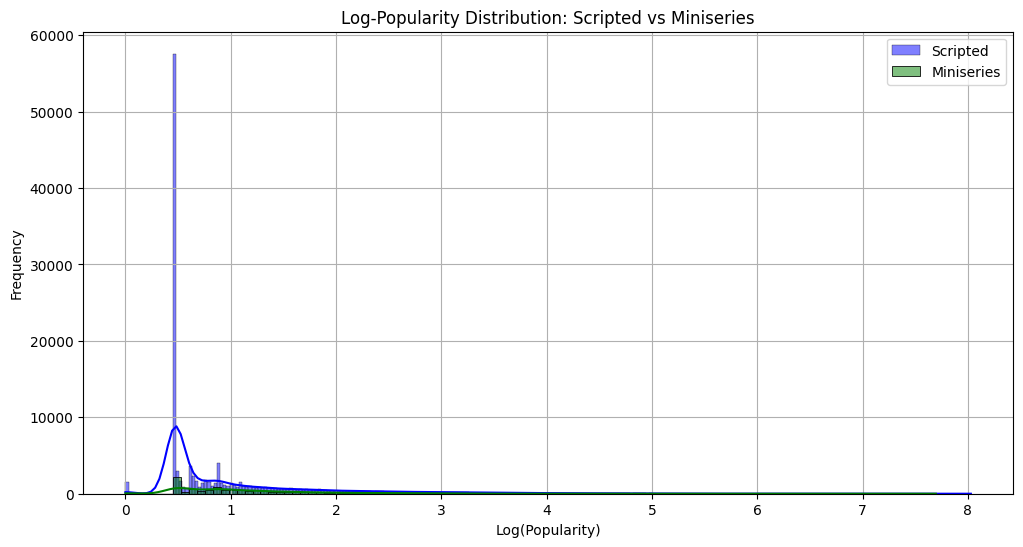

T-test between Scripted and Documentary:
T-statistic: 37.1148
P-value: 0.0000



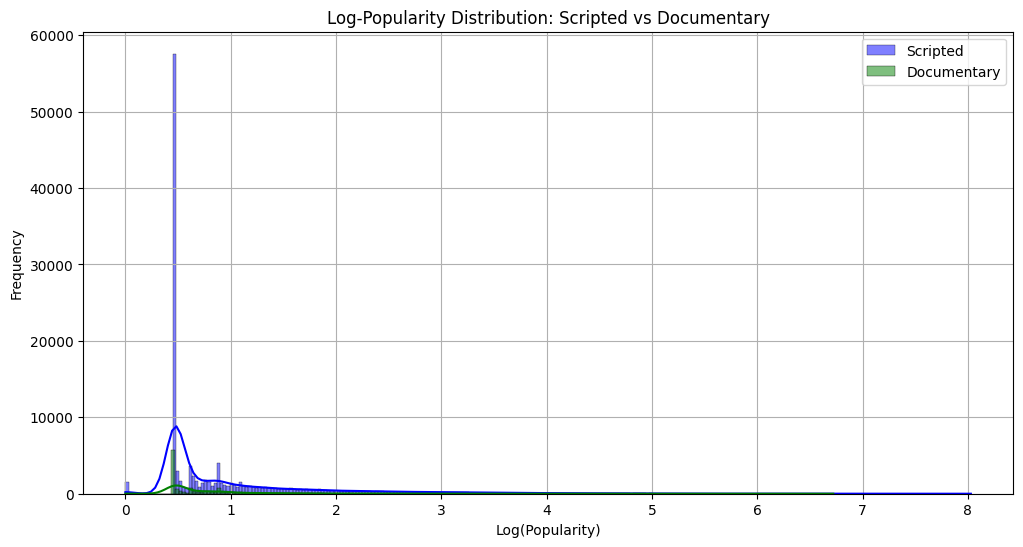

T-test between Scripted and Reality:
T-statistic: -12.1799
P-value: 0.0000



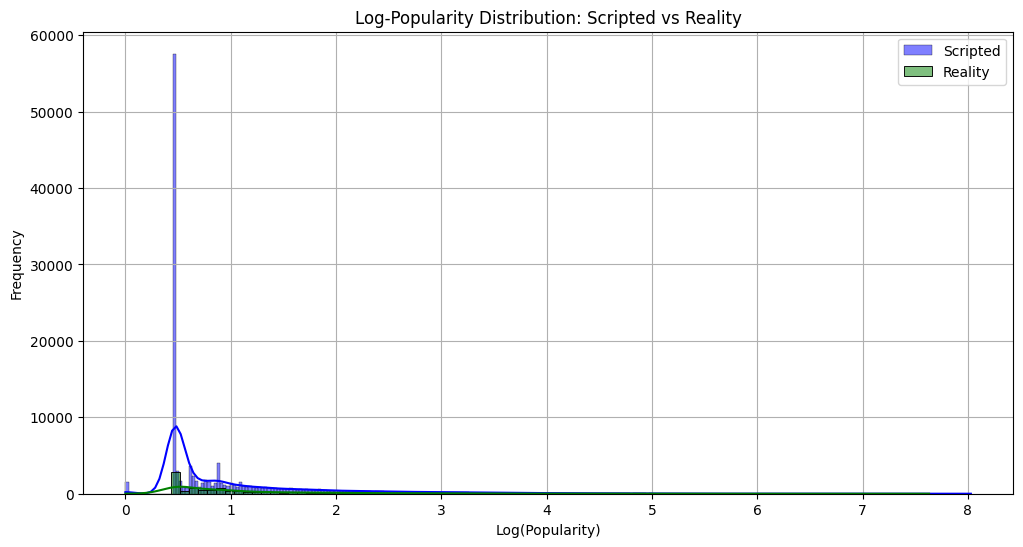

T-test between Scripted and Talk Show:
T-statistic: -16.0488
P-value: 0.0000



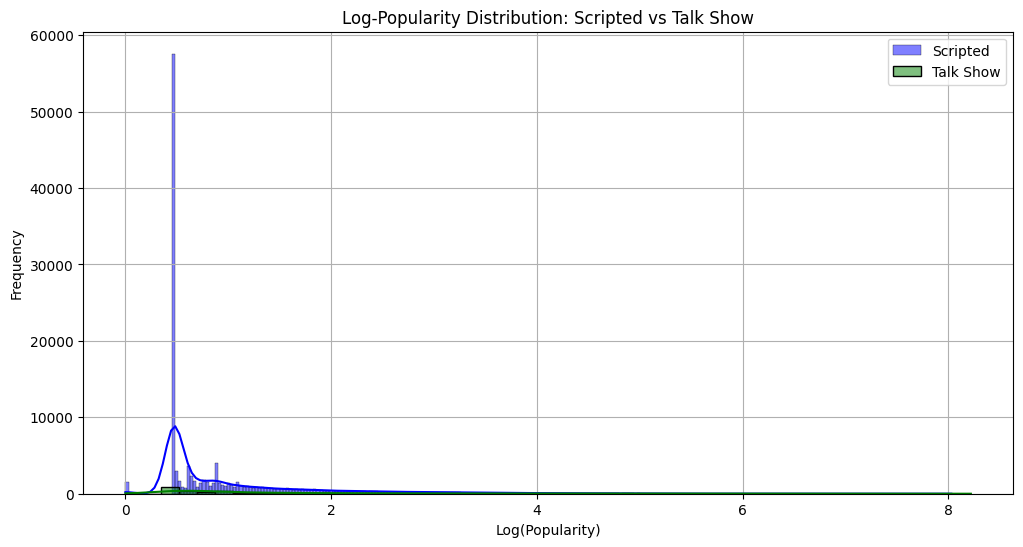

T-test between Scripted and News:
T-statistic: -6.4632
P-value: 0.0000



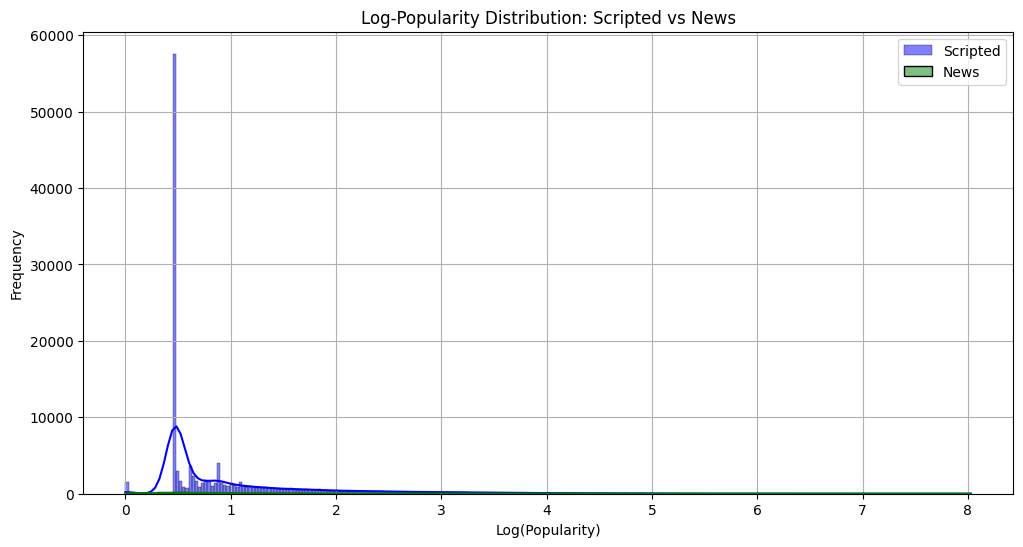

T-test between Scripted and Video:
T-statistic: 18.6414
P-value: 0.0000



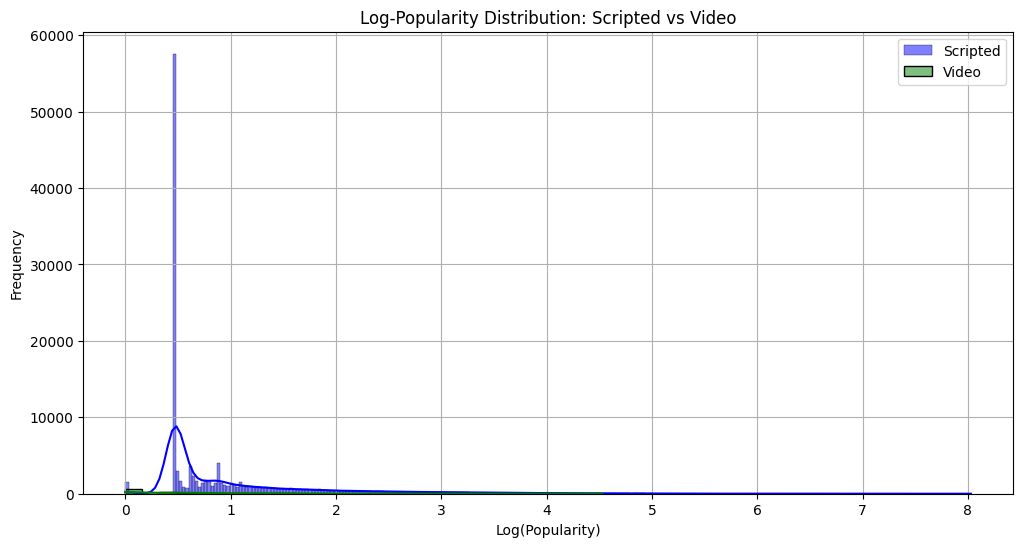

T-test between Miniseries and Documentary:
T-statistic: 37.5474
P-value: 0.0000



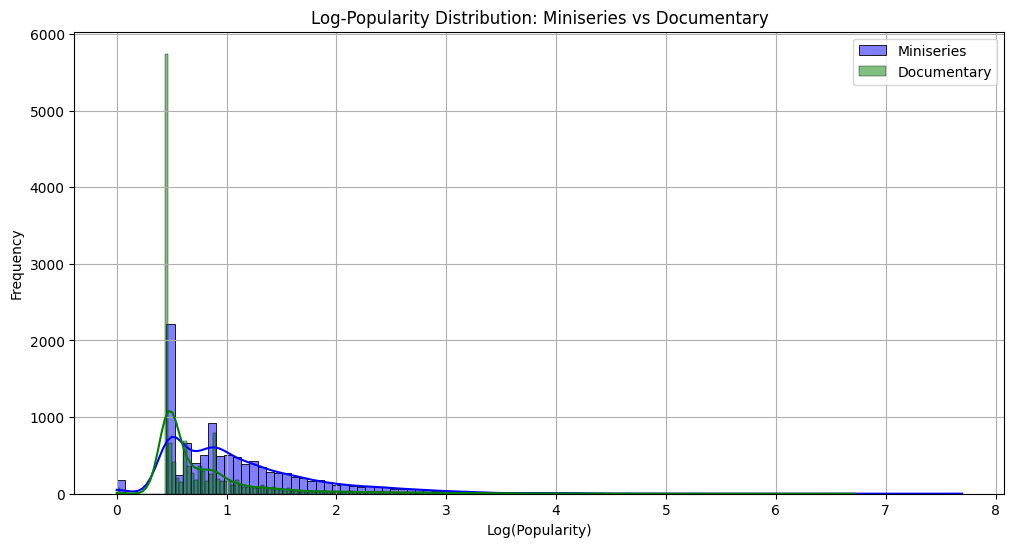

T-test between Miniseries and Reality:
T-statistic: -0.3673
P-value: 0.7134



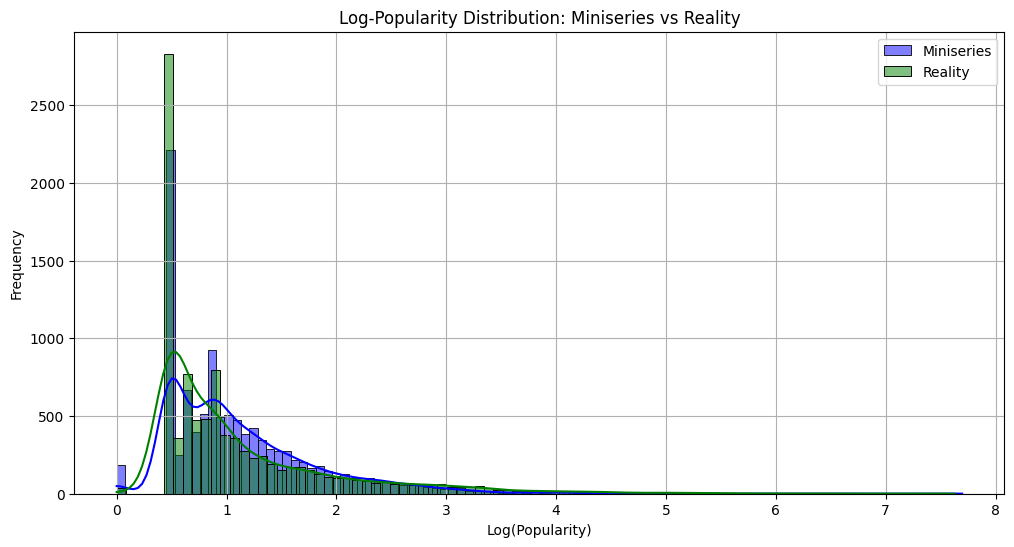

T-test between Miniseries and Talk Show:
T-statistic: -10.8249
P-value: 0.0000



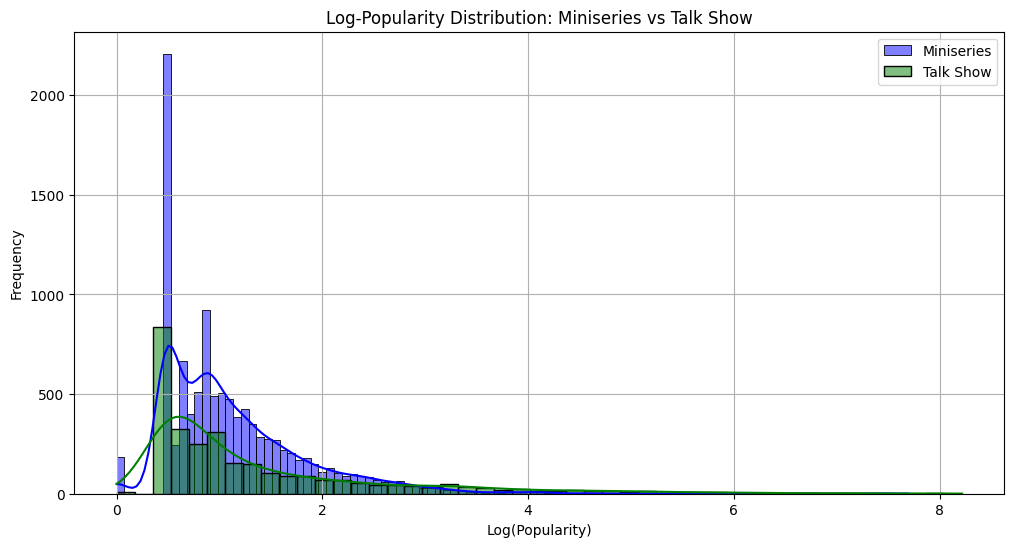

T-test between Miniseries and News:
T-statistic: -4.4383
P-value: 0.0000



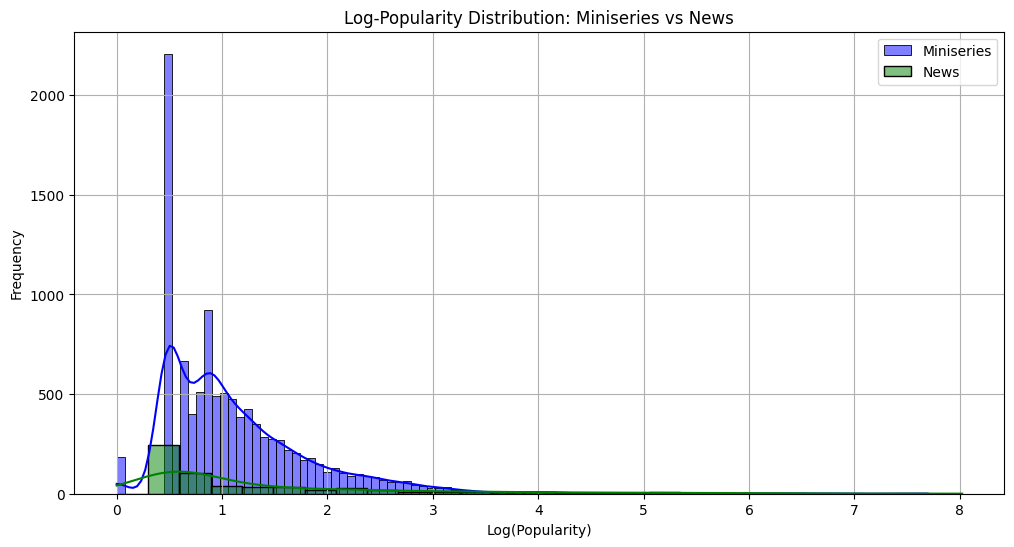

T-test between Miniseries and Video:
T-statistic: 22.8453
P-value: 0.0000



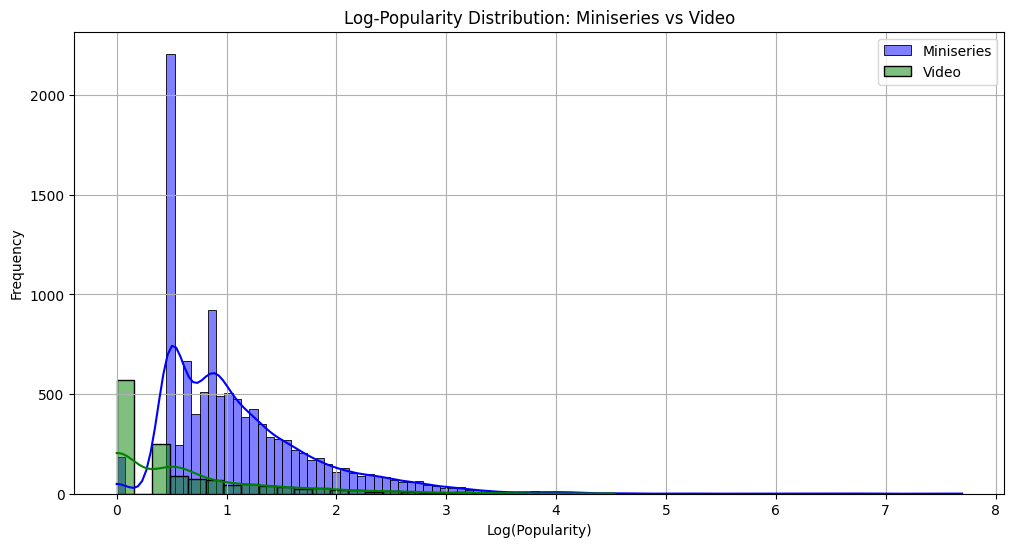

T-test between Documentary and Reality:
T-statistic: -31.2688
P-value: 0.0000



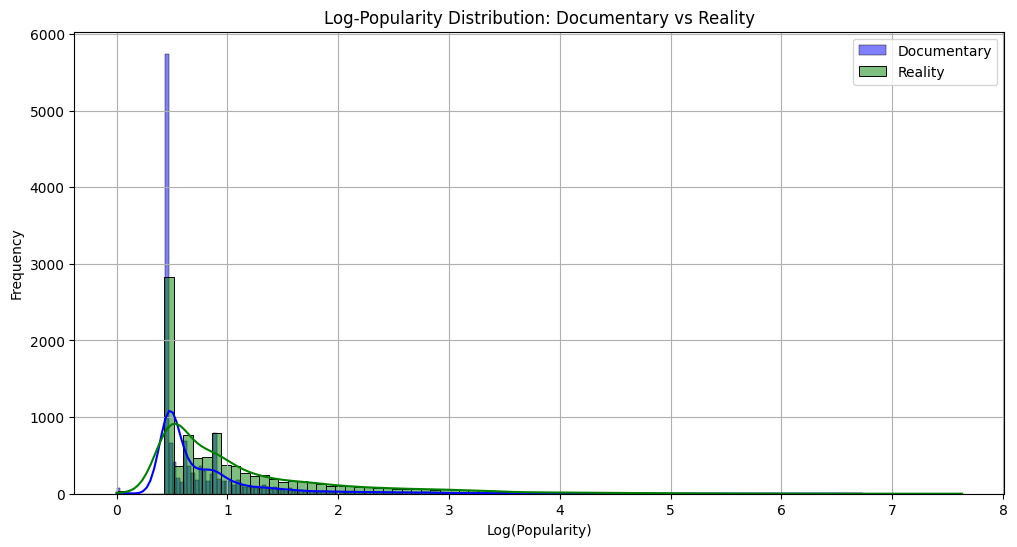

T-test between Documentary and Talk Show:
T-statistic: -24.7586
P-value: 0.0000



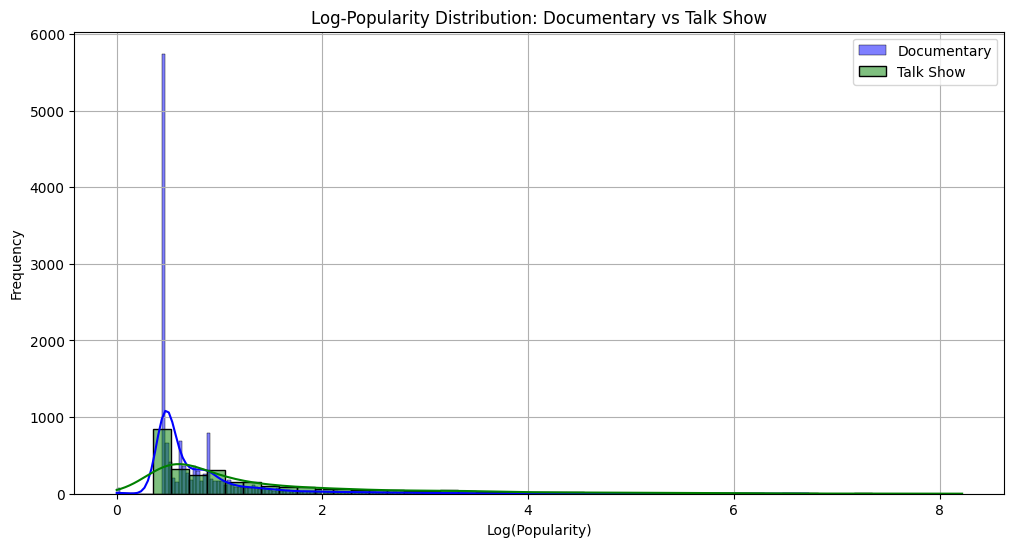

T-test between Documentary and News:
T-statistic: -10.2301
P-value: 0.0000



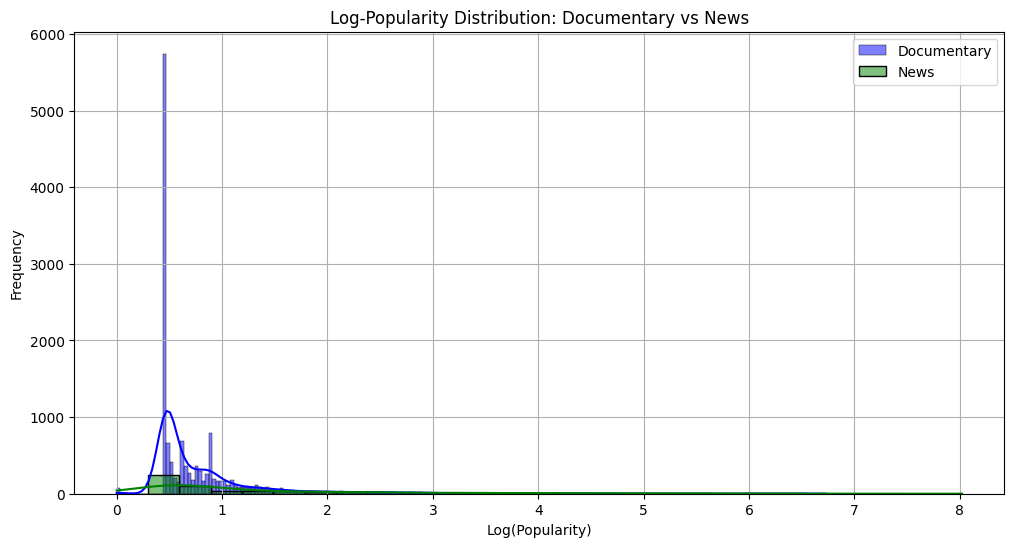

T-test between Documentary and Video:
T-statistic: 8.5084
P-value: 0.0000



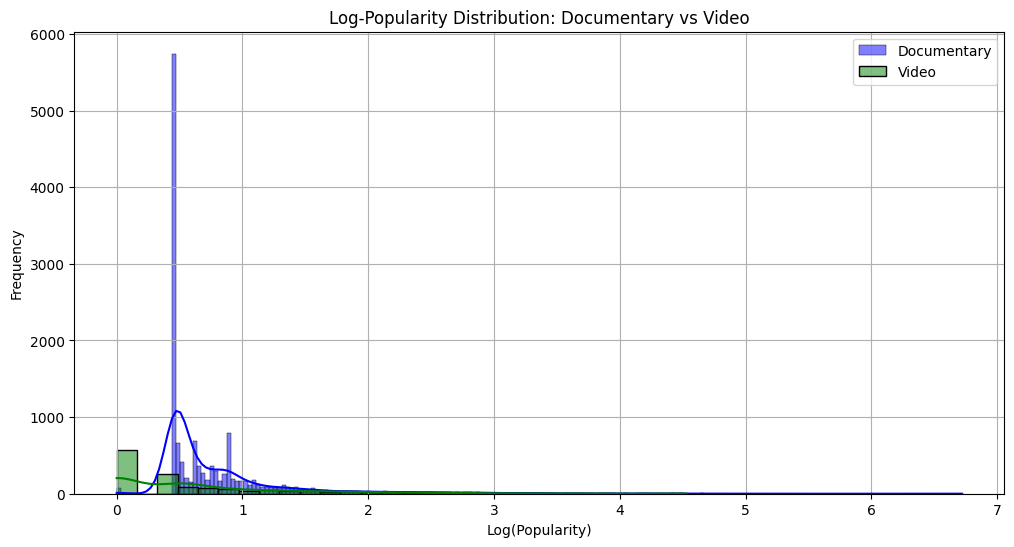

T-test between Reality and Talk Show:
T-statistic: -10.3356
P-value: 0.0000



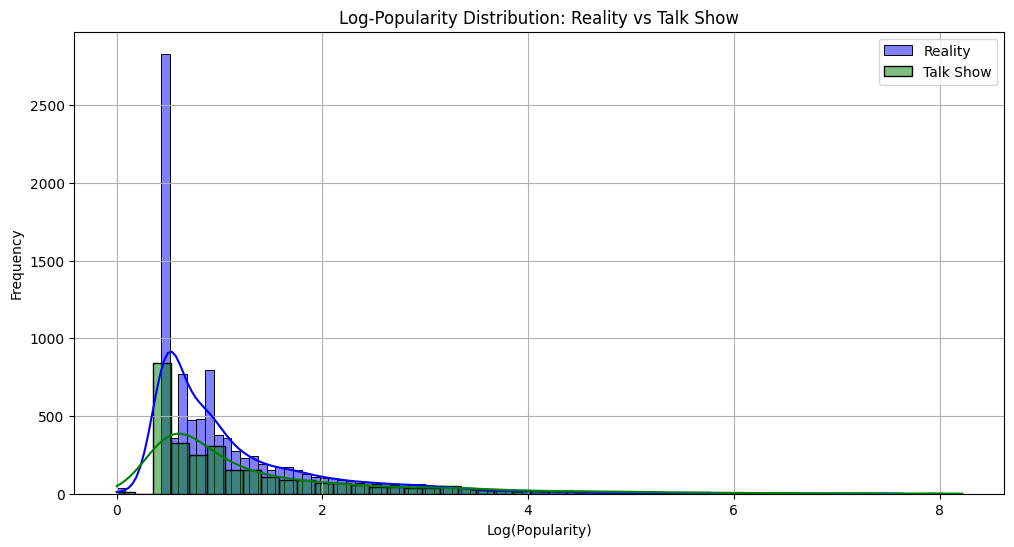

T-test between Reality and News:
T-statistic: -4.3389
P-value: 0.0000



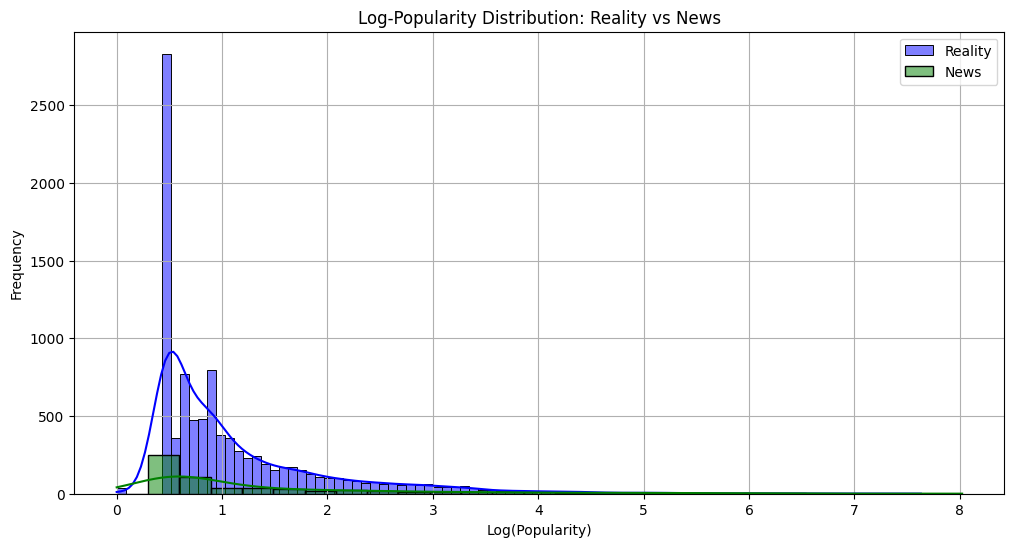

T-test between Reality and Video:
T-statistic: 22.2496
P-value: 0.0000



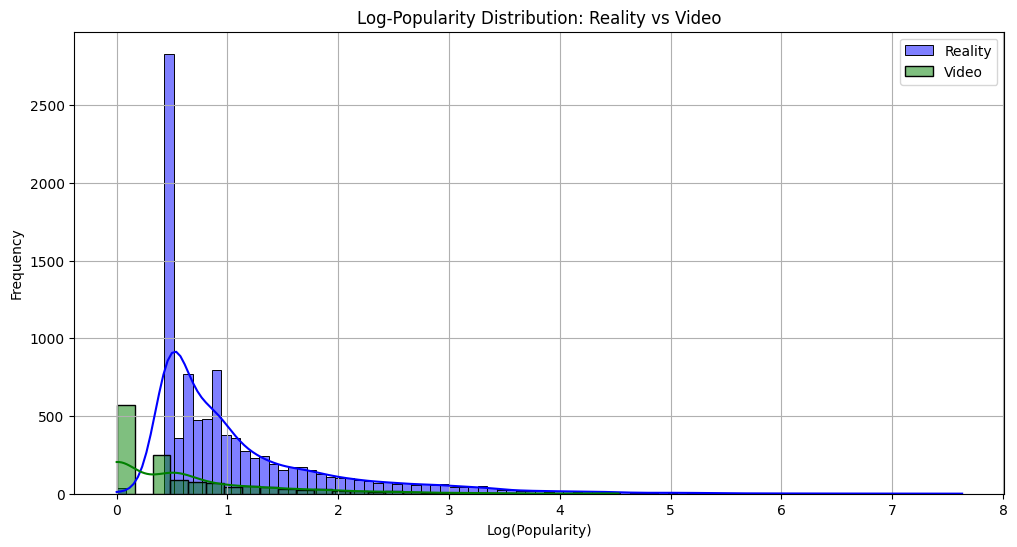

T-test between Talk Show and News:
T-statistic: 0.1777
P-value: 0.8590



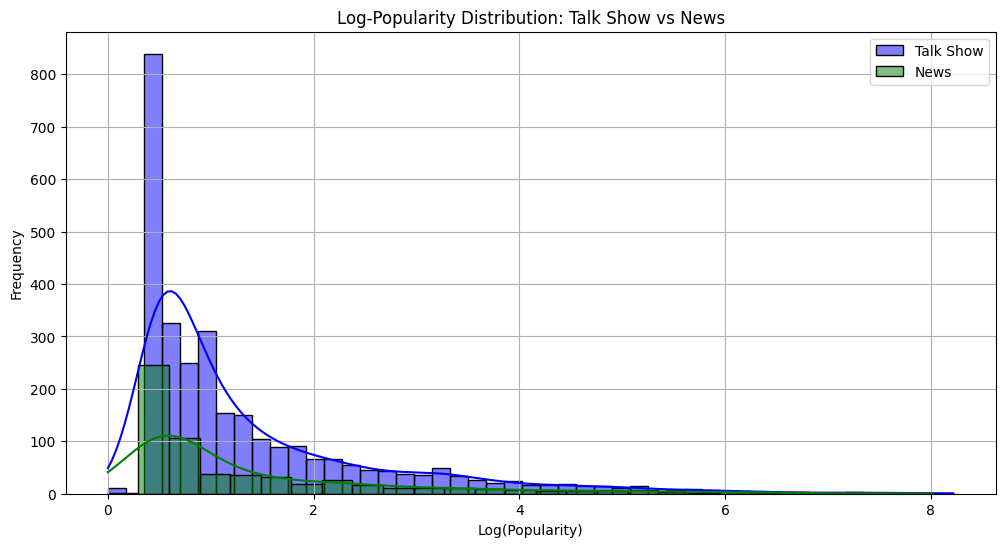

T-test between Talk Show and Video:
T-statistic: 24.5942
P-value: 0.0000



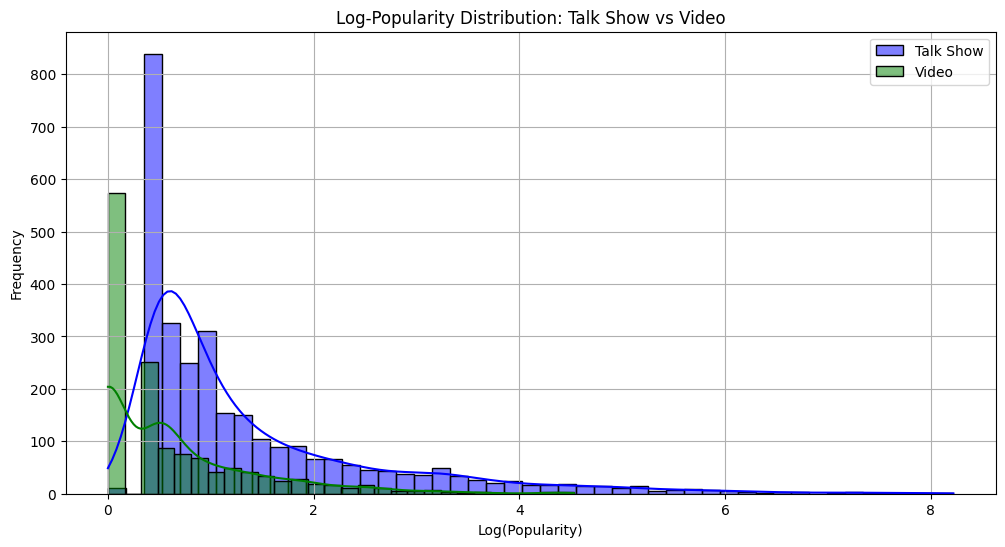

T-test between News and Video:
T-statistic: 12.7105
P-value: 0.0000



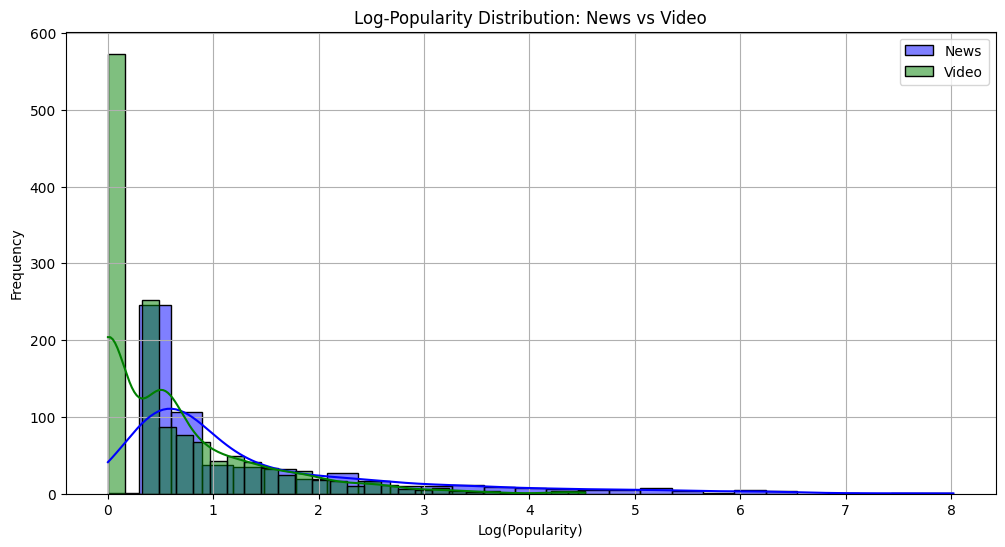

In [8]:


# Get unique show types
type_list = tv_['type'].unique().tolist()

# Perform pairwise T-tests for all unique pairs
for i in range(len(type_list)):
    for j in range(i + 1, len(type_list)):  # Avoid duplicate comparisons
        type1 = tv_[tv_['type'] == type_list[i]]['popularity']
        type2 = tv_[tv_['type'] == type_list[j]]['popularity']

        # Apply Log Transformation to Popularity to handle skewness
        type1 = np.log1p(type1)  # log(1 + x) avoids log(0) errors
        type2 = np.log1p(type2)

        # Perform an independent samples T-test
        t_stat, p_value = stats.ttest_ind(type1, type2, equal_var=False)

        # Print the results
        print(f'T-test between {type_list[i]} and {type_list[j]}:')
        print(f'T-statistic: {t_stat:.4f}')
        print(f'P-value: {p_value:.4f}\n')

        # Plotting distribution comparison
        plt.figure(figsize=(12, 6))
        sns.histplot(type1, kde=True, color='blue', label=type_list[i], alpha=0.5)
        sns.histplot(type2, kde=True, color='green', label=type_list[j], alpha=0.5)
        plt.title(f'Log-Popularity Distribution: {type_list[i]} vs {type_list[j]}')
        plt.xlabel('Log(Popularity)')
        plt.ylabel('Frequency')
        plt.legend()
        plt.grid(True)
        plt.show()


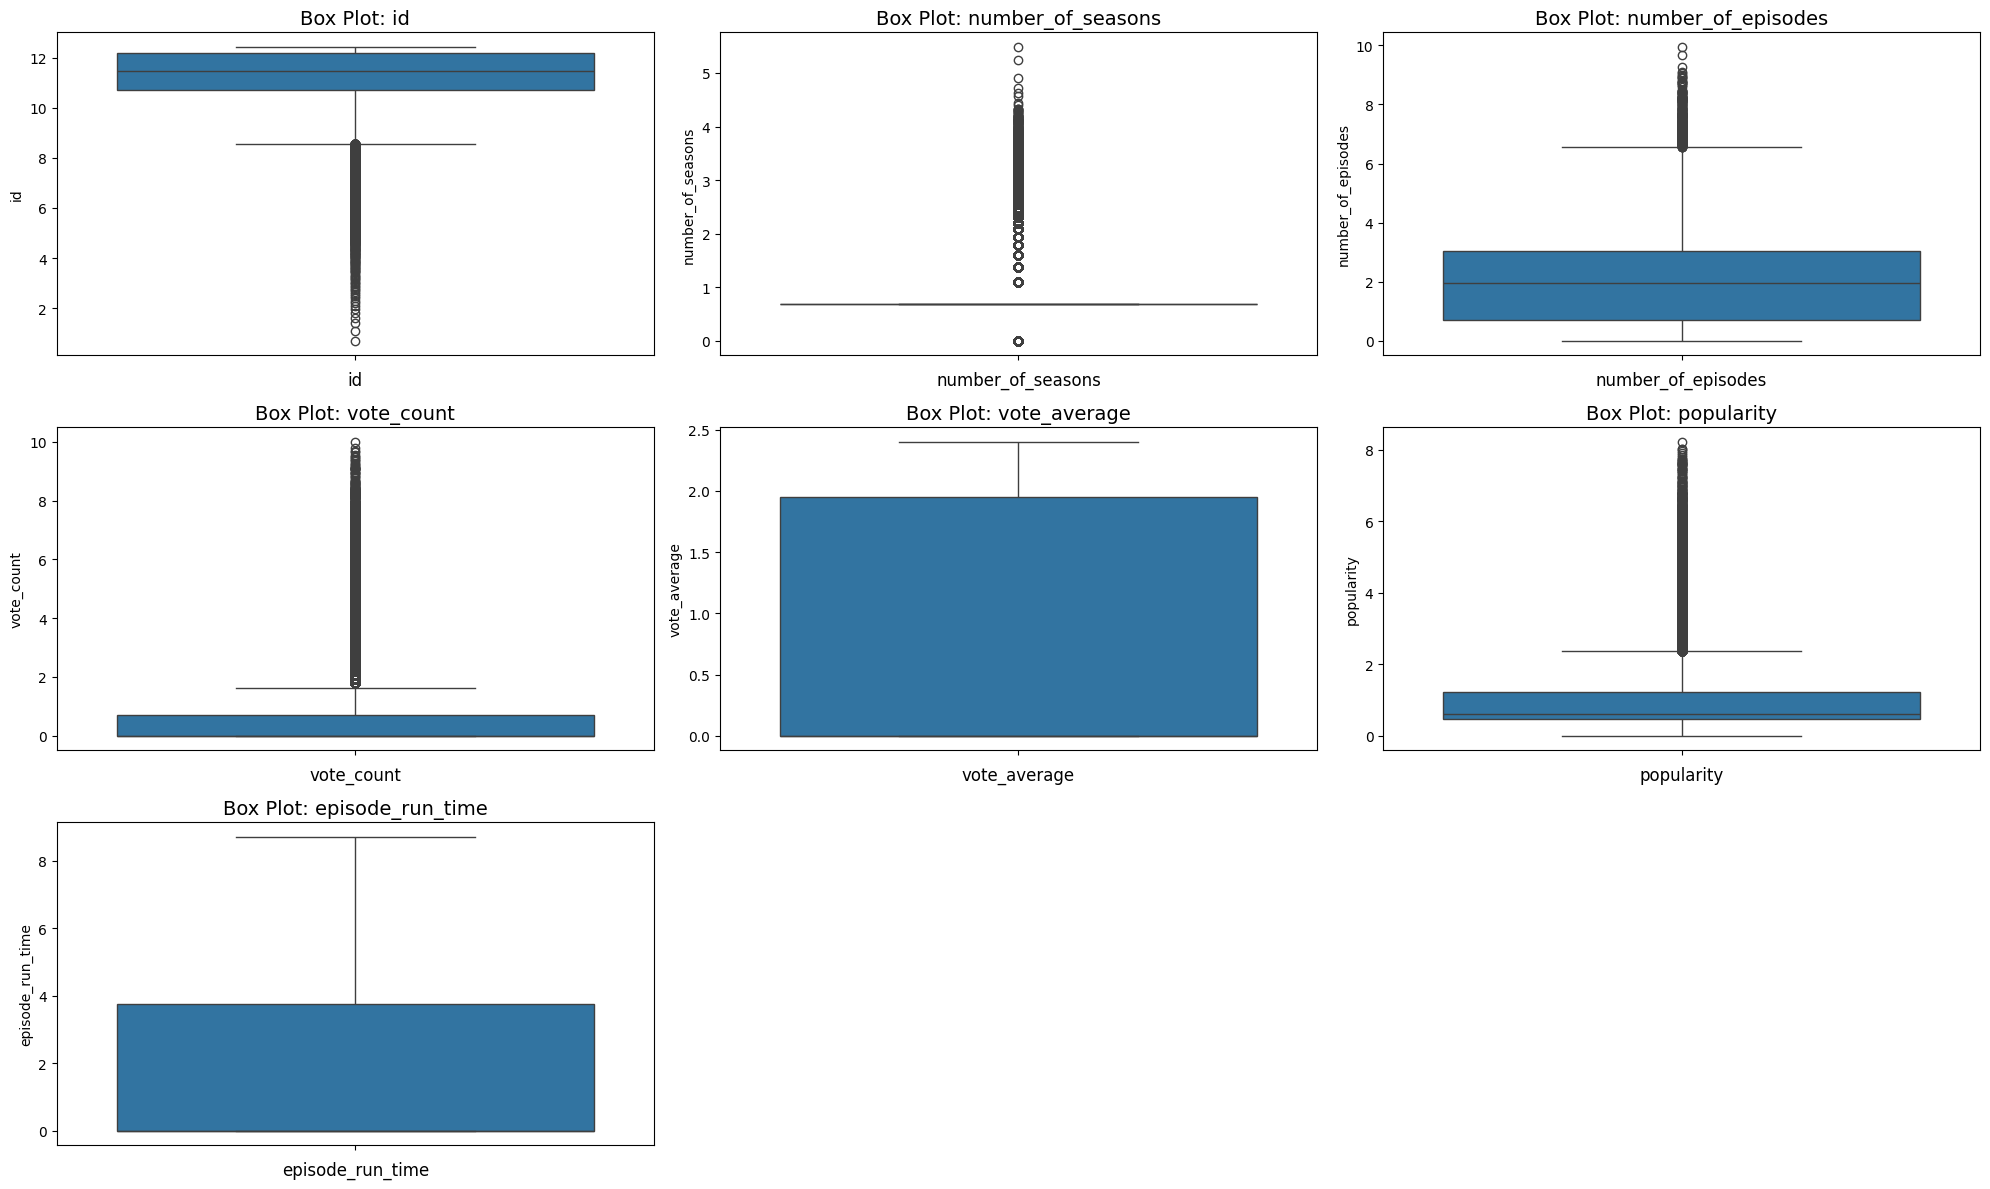

In [14]:

import math
tv_out = tv_[['id','number_of_seasons','number_of_episodes','vote_count','vote_average','popularity','episode_run_time']]

def outliers_boxplot(df):
    num_cols = len(df.columns)
    rows = math.ceil(num_cols / 3)  # Dynamically set rows for 3 columns
    plt.figure(figsize=(20, rows * 4))  # Adjust figure size

    for i, col in enumerate(df.columns):
        ax = plt.subplot(rows, 3, i + 1)

        sns.boxplot(data=np.log1p(df[col]), ax=ax)  # log(1+x) to avoid log(0) errors

        plt.title(f'Box Plot: {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)

    plt.tight_layout()  # Automatically adjusts spacing
    plt.show()

outliers_boxplot(tv_out)


In [11]:
#col_lst = con_df.columns.to_list()
#col_lst.append('type')
#col_lst
#for_pair = tv_[col_lst]
#sns.pairplot(for_pair, hue='type')
#plt.show()

KeyboardInterrupt: 

# Ading more columns 

In [8]:
tv_.head(20)
#Adding column for period of each show and removing the date time 

tv_ = tv_.drop(columns = ['last_air_date','first_air_date'])
def aired_t(row):
    if pd.isna(row['year_start']) or pd.isna(row['year_end']) or \
           pd.isna(row['month_start']) or pd.isna(row['month_end']):
            return pd.NA  # Keep NaN values
    
    aired = (row['year_end'] - row['year_start']) * 12 + (row['month_end'] - row['month_start'])
    return aired / 12.0

tv_['aired_time'] =tv_.apply(aired_t, axis=1)
#tv_['aired_time'] = (tv_['last_air_year'] - tv_['first_air_year']) *12 + (tv_['last_air_month'] - tv_['first_air_month'])
#tv_['aired_time']=tv_['aired_time']/12

tv_['aired_time'].head(30)

0      8.083333
1      4.583333
2           6.0
3     12.083333
4      5.666667
5      6.583333
6           0.0
7      5.666667
8      5.666667
9      0.166667
10     8.583333
11    11.666667
12     0.083333
13    18.166667
14     3.416667
15    33.833333
16     2.666667
17     3.333333
18     8.583333
19     4.083333
20          3.0
21          9.0
22          7.5
23     0.083333
24    10.083333
25          6.5
26          0.0
27     9.666667
28    15.166667
29     4.666667
Name: aired_time, dtype: object

# check statistics for string column for best column adjustments 

In [20]:
# A function to find combined network on the same show

def find_coop(row):
    row_num = str(row).split(', ')
    len_row = len(row_num)
    if len_row > 1:
        return 'multiple'
    else:
        return row

In [21]:


#print(tv_['networks'].nunique())
top_10_net = tv_['networks'].value_counts().sort_values(ascending =False).head(10)
filtered_tv = tv_.copy()
filtered_tv['networks'] = filtered_tv['networks'].apply(find_coop)
filtered_tv['networks'] = filtered_tv['networks'].apply(lambda x : x if x in top_10_net.index or x=='multiple' else ('other' if pd.notna(x) else 'not_assign') )

#print(filtered_tv['networks'].head(20))

# checking if grouping and creating new categories helps 
popularity_per_network = filtered_tv.groupby('networks')['popularity'].mean().sort_values(ascending=False)
print(popularity_per_network)

tv_ = filtered_tv

 #Plot the popularity of the top 10 networks
plt.figure(figsize=(12, 6))
sns.barplot(x=popularity_per_network.index, y=popularity_per_network.values,hue =popularity_per_network.index , palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Networks")
plt.ylabel("Total Popularity")
plt.title("Total Popularity of Top 10 Networks")
#sns.scatterplot ( tv_, hue ='networks',x='networks' , y ='popularity') 
plt.show()


networks
CBS           39.245282
NBC           29.765923
ABC           22.927915
multiple      18.043836
Netflix       14.246856
ITV1           7.781501
BBC One        7.593813
other          7.078651
TVB Jade       5.954187
YouTube        5.718837
Channel 4      4.859175
BBC Two        3.380262
not_assign     1.437834
Name: popularity, dtype: float64


## type /status


In [22]:
#print(tv_['type'].isnull().sum())
print(tv_.value_counts('type').sort_values(ascending = False)) # looks fine for dummies
#tv_.info()
sns.barplot(data=tv_, x='type', y='popularity', estimator= lambda x: x.mean(), palette='viridis')
plt.xticks(rotation=45)
#sns.scatterplot(data=tv_, hue='type',x='vote_average', y='popularity')
plt.show()

#status :
print(tv_.value_counts('status').sort_values(ascending = False))
#print(tv_['status'].isnull().sum())

'''Both columns looks fine to be converted to dummies'''

type
Scripted       129301
Documentary     13864
Miniseries      10810
Reality          9682
Talk Show        2997
Video            1379
News              606
Name: count, dtype: int64
status
Ended               93232
Returning Series    67507
Canceled             4634
In Production        2380
Planned               650
Pilot                 236
Name: count, dtype: int64


'Both columns looks fine to be converted to dummies'

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
                

# Handle overview - a numerical connection to popularuty ?

In [ ]:
def word_len(row):
    if pd.isna(row):  # Handle NaN values
        return 0 # instead of nan returns 0
    return len(row.split(' '))  # Count words
    
tv_['overview_length'] = tv_['overview'].apply(word_len)

#print(tv_['overview_length'].isnull().sum()) # = 0
#print(tv_['popularity'].isnull().sum()) # = 0



tv_cop = tv_.loc[tv_['overview_length'] !=-0]
# Scatter plot (corrected)
sns.scatterplot(data=tv_cop, x='overview_length', y='popularity')
plt.show()
#sns.scatterplot(data=tv_, x='overview_length', y='popularity')
#plt.show()

In [ ]:

#tv_ = tv_.drop(columns = ['id','genres'])
# encoding 
bool_lst = [col for col in tv_.select_dtypes('bool')]
for col in bool_lst :
    tv_[col] = tv_[col].astype(int)
#tv_.info()
    
cols_ = ['type','status','networks']

for col in cols_:
    tv_[col] = tv_[col].astype('category')
    tv_[col] = tv_[col].cat.codes

tv_.info()